<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [78]:
import pandas as pd

Load the dataset into a dataframe.


In [79]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [80]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [81]:
df["ConvertedComp"].head()

0     61000.0
1     95179.0
2     90000.0
3    455352.0
4     65277.0
Name: ConvertedComp, dtype: float64

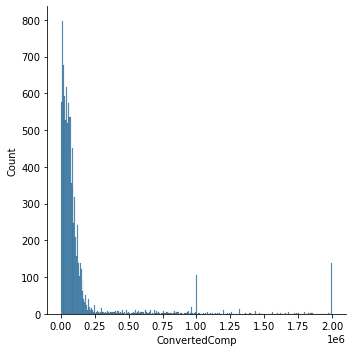

In [82]:
# your code goes here
import seaborn as sns
# Also works
# sns.displot(df['ConvertedComp'])
# plt.show()

sns.displot(df, x="ConvertedComp")

Plot the histogram for the column `ConvertedComp`.


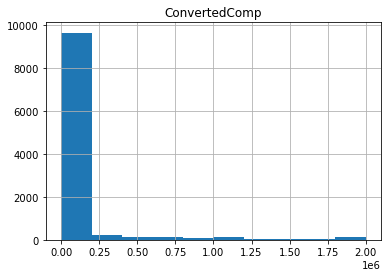

In [83]:
# your code goes here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Also works
# hist = df['ConvertedComp'].hist()

df.hist(column='ConvertedComp');


What is the median of the column `ConvertedComp`?


In [84]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [85]:
# your code goes here
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

In [86]:
#This Also works
df.loc[df['Gender'] == 'Man', ['ConvertedComp']]

,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
3,455352.0
4,65277.0
...,...
11393,130000.0
11394,19880.0
11395,105000.0
11396,80371.0


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [87]:
# your code goes here

# your code goes here
# group by gender and return the median of convertedcomp
df.groupby('Gender')['ConvertedComp'].median()


Gender
Man                                                            57744.0
Man;Non-binary, genderqueer, or gender non-conforming          59520.0
Non-binary, genderqueer, or gender non-conforming              67142.0
Woman                                                          57708.0
Woman;Man                                                      21648.0
Woman;Man;Non-binary, genderqueer, or gender non-conforming    30244.0
Woman;Non-binary, genderqueer, or gender non-conforming        65535.5
Name: ConvertedComp, dtype: float64

In [88]:
# This Also works
df.loc[df['Gender'] == 'Woman', ['ConvertedComp']].median()

ConvertedComp    57708.0
dtype: float64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [89]:
# your code goes here
#The five-number summary is a set of descriptive statistics that provides information about a dataset
# The five-number summary, or 5-number summary for short, is a non-parametric data summarization technique. 
# It is sometimes called the Tukey 5-number summary because it was recommended by John Tukey.
# It can be used to describe the distribution of data samples for data with any distribution
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

In [90]:
# This Also works
df.agg({"Age": ["min", "max", "median", "mean","skew"]} )

,Age
min,16.000000
max,99.000000
median,29.000000
mean,30.778895
skew,1.231310


Plot a histogram of the column `Age`.


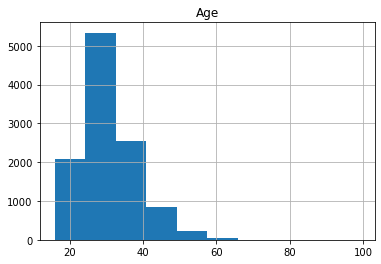

In [91]:
# your code goes here
df.hist(column='Age');

## Outliers


### Finding outliers


In [18]:
#This link will help for understanding the Pratical implementation of outliers 
# "https://towardsdatascience.com/practical-implementation-of-outlier-detection-in-python-90680453b3ce"
# https://stackoverflow.com/questions/39068214/how-to-count-outliers-for-all-columns-in-python

Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:xlabel='ConvertedComp'>

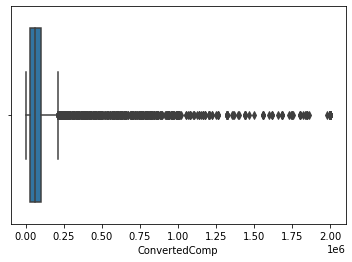

In [92]:
# your code goes here
sns.boxplot(x=df['ConvertedComp'])

In [93]:
# your code goes here
# This works by Creating function to implement IQR method
def Main_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    return IQR
Main_IQR(df['ConvertedComp'])
Inter_Quartile_Range = Main_IQR(df['ConvertedComp'])
Inter_Quartile_Range

73132.0

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [94]:

# your code goes here
iqr = df['ConvertedComp'][df['ConvertedComp'].between(df['ConvertedComp'].quantile(.25), df['ConvertedComp'].quantile(.75), inclusive=True)]
q1 = df['ConvertedComp'].quantile(.25)
q3 = df['ConvertedComp'].quantile(.75)
mask = df['ConvertedComp'].between(q1, q3, inclusive=True)
iqr = df.loc[mask, 'ConvertedComp']
iqr_q3_q1 = q3 - q1
print(iqr)
print('The IQR for the q1 and q3:', iqr_q3_q1)

0        61000.0
1        95179.0
2        90000.0
4        65277.0
5        31140.0
          ...   
11386    47724.0
11387    39180.0
11389    35518.0
11391    68748.0
11396    80371.0
Name: ConvertedComp, Length: 5380, dtype: float64
The IQR for the q1 and q3: 73132.0


In [95]:
#This gives Q1 and Q3 for each colunm
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
print(Q1)
print(Q3)

Respondent        6264.25
CompTotal        25000.00
ConvertedComp    26868.00
WorkWeekHrs         40.00
CodeRevHrs           2.00
Age                 25.00
Name: 0.25, dtype: float64
Respondent        18784.75
CompTotal        120000.00
ConvertedComp    100000.00
WorkWeekHrs          43.00
CodeRevHrs            5.00
Age                  35.00
Name: 0.75, dtype: float64


In [96]:
#Q1 FOR A specific colunm
Q1=df['ConvertedComp'].quantile(0.25)
Q3=df['ConvertedComp'].quantile(0.75)
print(Q1)
print(Q3)

26868.0
100000.0


Find out the upper and lower bounds.


In [97]:
# your code goes here

# your code goes here
Lower_Bound = Q1 -(1.5 * Inter_Quartile_Range)
Upper_Bound = Q3 +(1.5 * Inter_Quartile_Range)
print(Lower_Bound,Upper_Bound)

-82830.0 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [98]:
# your code goes here
def detect_outlier(data_1):
    outliers=[]
    count_outliers = 0
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
            count_outliers+=1
    return count_outliers

print(detect_outlier(df['ConvertedComp']))

240


<AxesSubplot:xlabel='ConvertedComp'>

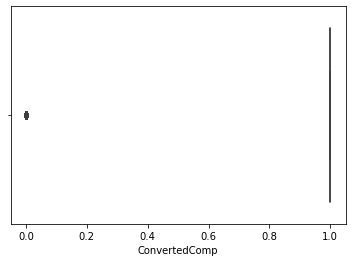

In [99]:
# your code goes here


sns.boxplot(x=df['ConvertedComp']>0.25)

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [31]:
cols = ['ConvertedComp'] 
df = df[~((df[cols] < (Q1 - 1.5 * Inter_Quartile_Range)) |(df[cols] > (Q3 + 1.5 * Inter_Quartile_Range))).any(axis=1)]
df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Cour...,36.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Difficult
11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Tech...,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,34.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy
11396,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",NaN,...,Somewhat l

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [100]:
# your code goes here
# your code goes here
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


In [39]:
Lower_Bound = Q1 -(1.5 * Inter_Quartile_Range)
Upper_Bound = Q3 +(1.5 * Inter_Quartile_Range)
print(Lower_Bound,Upper_Bound)



-82830.0 209698.0


In [61]:
# from scipy import stats
# z=np.abs(stats.zscore(df))
# print(z)

def z_score(df):
         df.columns = [x + "_zscore" for x in df.columns.tolist()]
         return ((df - df.mean())/df.std(ddof=0))
z_score(df)        

,Age1stCode_zscore_zscore_zscore_zscore_zscore,Age_zscore_zscore_zscore_zscore_zscore,BetterLife_zscore_zscore_zscore_zscore_zscore,BlockchainIs_zscore_zscore_zscore_zscore_zscore,BlockchainOrg_zscore_zscore_zscore_zscore_zscore,CareerSat_zscore_zscore_zscore_zscore_zscore,CodeRevHrs_zscore_zscore_zscore_zscore_zscore,CodeRev_zscore_zscore_zscore_zscore_zscore,CompFreq_zscore_zscore_zscore_zscore_zscore,CompTotal_zscore_zscore_zscore_zscore_zscore,...,WebFrameDesireNextYear_zscore_zscore_zscore_zscore_zscore,WebFrameWorkedWith_zscore_zscore_zscore_zscore_zscore,WelcomeChange_zscore_zscore_zscore_zscore_zscore,WorkChallenge_zscore_zscore_zscore_zscore_zscore,WorkLoc_zscore_zscore_zscore_zscore_zscore,WorkPlan_zscore_zscore_zscore_zscore_zscore,WorkRemote_zscore_zscore_zscore_zscore_zscore,WorkWeekHrs_zscore_zscore_zscore_zscore_zscore,YearsCodePro_zscore_zscore_zscore_zscore_zscore,YearsCode_zscore_zscore_zscore_zscore_zscore
0,NaN,-1.176092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.092343,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.568041,NaN,NaN
1,NaN,-1.040085,NaN,NaN,NaN,NaN,1.551002,NaN,NaN,-0.081625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.407227,NaN,NaN
2,NaN,-0.360051,NaN,NaN,NaN,NaN,0.041122,NaN,NaN,-0.088306,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.078015,NaN,NaN
4,NaN,-0.224044,NaN,NaN,NaN,NaN,0.041122,NaN,NaN,-0.088306,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.127742,NaN,NaN
5,NaN,0.047970,NaN,NaN,NaN,NaN,-0.390272,NaN,NaN,-0.099511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.394861,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,NaN,0.728004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.082738,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.078015,NaN,NaN
11394,NaN,-0.768071,NaN,NaN,NaN,NaN,0.041122,NaN,NaN,-0.090478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.078015,NaN,NaN
11395,NaN,0.455991,NaN,NaN,NaN,NaN,0.041122,NaN,NaN,-0.086218,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.078015,NaN,NaN
11396,NaN,-0.768071,NaN,NaN,NaN,NaN,-0.605969,NaN,NaN,-0.089698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024863,NaN,NaN


In [65]:
# Z-Score
df_zscore = (df - df.mean())/df.std()
df_zscore 

,Age1stCode_zscore_zscore_zscore_zscore_zscore,Age_zscore_zscore_zscore_zscore_zscore,BetterLife_zscore_zscore_zscore_zscore_zscore,BlockchainIs_zscore_zscore_zscore_zscore_zscore,BlockchainOrg_zscore_zscore_zscore_zscore_zscore,CareerSat_zscore_zscore_zscore_zscore_zscore,CodeRevHrs_zscore_zscore_zscore_zscore_zscore,CodeRev_zscore_zscore_zscore_zscore_zscore,CompFreq_zscore_zscore_zscore_zscore_zscore,CompTotal_zscore_zscore_zscore_zscore_zscore,...,WebFrameDesireNextYear_zscore_zscore_zscore_zscore_zscore,WebFrameWorkedWith_zscore_zscore_zscore_zscore_zscore,WelcomeChange_zscore_zscore_zscore_zscore_zscore,WorkChallenge_zscore_zscore_zscore_zscore_zscore,WorkLoc_zscore_zscore_zscore_zscore_zscore,WorkPlan_zscore_zscore_zscore_zscore_zscore,WorkRemote_zscore_zscore_zscore_zscore_zscore,WorkWeekHrs_zscore_zscore_zscore_zscore_zscore,YearsCodePro_zscore_zscore_zscore_zscore_zscore,YearsCode_zscore_zscore_zscore_zscore_zscore
0,NaN,-1.176035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.092338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.567966,NaN,NaN
1,NaN,-1.040034,NaN,NaN,NaN,NaN,1.550908,NaN,NaN,-0.081620,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.407207,NaN,NaN
2,NaN,-0.360033,NaN,NaN,NaN,NaN,0.041120,NaN,NaN,-0.088302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.078012,NaN,NaN
4,NaN,-0.224033,NaN,NaN,NaN,NaN,0.041120,NaN,NaN,-0.088302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.127736,NaN,NaN
5,NaN,0.047968,NaN,NaN,NaN,NaN,-0.390249,NaN,NaN,-0.099506,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.394794,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,NaN,0.727969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.082734,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.078012,NaN,NaN
11394,NaN,-0.768034,NaN,NaN,NaN,NaN,0.041120,NaN,NaN,-0.090473,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.078012,NaN,NaN
11395,NaN,0.455968,NaN,NaN,NaN,NaN,0.041120,NaN,NaN,-0.086214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.078012,NaN,NaN
11396,NaN,-0.768034,NaN,NaN,NaN,NaN,-0.605933,NaN,NaN,-0.089693,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024862,NaN,NaN


In [101]:
z=np.abs(stats.zscore(df['ConvertedComp']))
print(z)

[nan nan nan ... nan nan nan]


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01\&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264\&cm_mmca1=000026UJ\&cm_mmca2=10006555\&cm_mmca3=M12345678\&cvosrc=email.Newsletter.M12345678\&cvo_campaign=000026UJ).
